This notebook removes outliers from the data and save the final data to a csv file

In [ ]:
import logging
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"
%matplotlib inline

In [30]:
logging.info('Loading data sets')

df_mean = pd.read_csv(r"..\data\mean_features.csv")

logging.info('Loading data sets done.')

## Remove outliers for mean features

In [68]:
df_mean_B = df_mean.loc[df_mean['diagnosis'] == 0]
df_mean_B.drop('Unnamed: 0',axis=1,inplace=True)
df_mean_B = df_mean_B[df_mean_B['radius_mean'] > -1.8]
df_mean_B = df_mean_B[df_mean_B['radius_mean'] < 0.7]

df_mean_M = df_mean.loc[df_mean['diagnosis'] == 1]
df_mean_M.drop('Unnamed: 0',axis=1,inplace=True)
df_mean_M = df_mean_M[df_mean_M['radius_mean'] > -1]
df_mean_M = df_mean_M[df_mean_M['radius_mean'] < 3.3 ]
df_mean_M

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

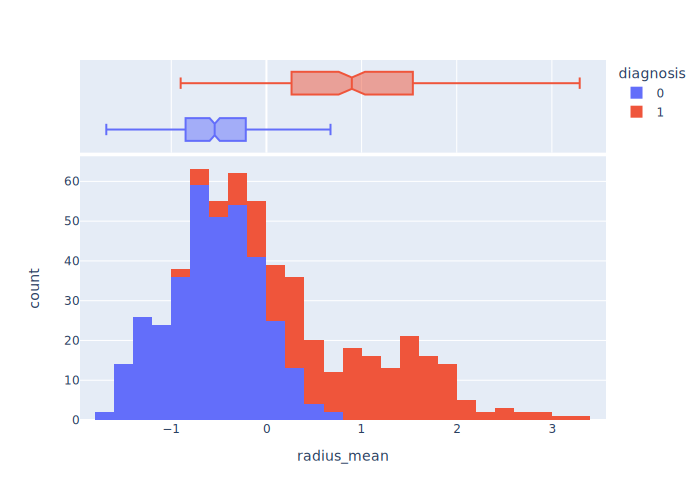

In [67]:
fig = px.histogram(df_mean_F, x='radius_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_M.columns)
fig.show()

Outliers in radius mean have been removed 